In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
techno = pd.read_csv('alfa.csv')
techno.head()

,Timestamp,Gender,Your study year,Which department,How many electronic devices do you use?,What is your recent latest CGPA ?,Is there an increase in your CGPA?,Average hour you spent using electronic devices for academic purposes in a day (hours).,What is the purpose of buying the device?
0,7/19/2022 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call"
1,7/21/2022 2:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
2,7/21/2022 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call"
3,8/22/2022 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
4,8/22/2022 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment"


In [3]:
techno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   Timestamp                                                                                30 non-null     object
 1   Gender                                                                                   30 non-null     object
 2   Your study year                                                                          30 non-null     object
 3   Which department                                                                         30 non-null     object
 4   How many electronic devices do you use?                                                  30 non-null     int64 
 5   What is your recent latest CGPA ?                                         

In [4]:
# change the columns
techno.columns = ['time', 'gender', 'study_year',
                  'department', 'num_of_gadget', 
                  'recent_grade', 'gpa_increase', 
                  'mean_hour', 'purpose']

In [5]:
techno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   time           30 non-null     object
 1   gender         30 non-null     object
 2   study_year     30 non-null     object
 3   department     30 non-null     object
 4   num_of_gadget  30 non-null     int64 
 5   recent_grade   30 non-null     object
 6   gpa_increase   30 non-null     object
 7   mean_hour      30 non-null     object
 8   purpose        30 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.2+ KB


In [6]:
#change object type to datetime series
techno['time'] = pd.to_datetime(techno['time'])

In [7]:
techno.head()

,time,gender,study_year,department,num_of_gadget,recent_grade,gpa_increase,mean_hour,purpose
0,2022-07-19 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call"
1,2022-07-21 02:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
2,2022-07-21 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call"
3,2022-08-22 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M..."
4,2022-08-22 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment"


In [8]:
techno['daily_hour'] = (techno['mean_hour'].str.split('-',
                                                      expand = True)[0].astype(int) +
                        techno['mean_hour'].str.split('-',
                        expand = True)[1].astype(int))/2

In [9]:
techno.head()

,time,gender,study_year,department,num_of_gadget,recent_grade,gpa_increase,mean_hour,purpose,daily_hour
0,2022-07-19 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call",5.0
1,2022-07-21 02:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M...",2.0
2,2022-07-21 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call",5.0
3,2022-08-22 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M...",2.0
4,2022-08-22 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment",5.0


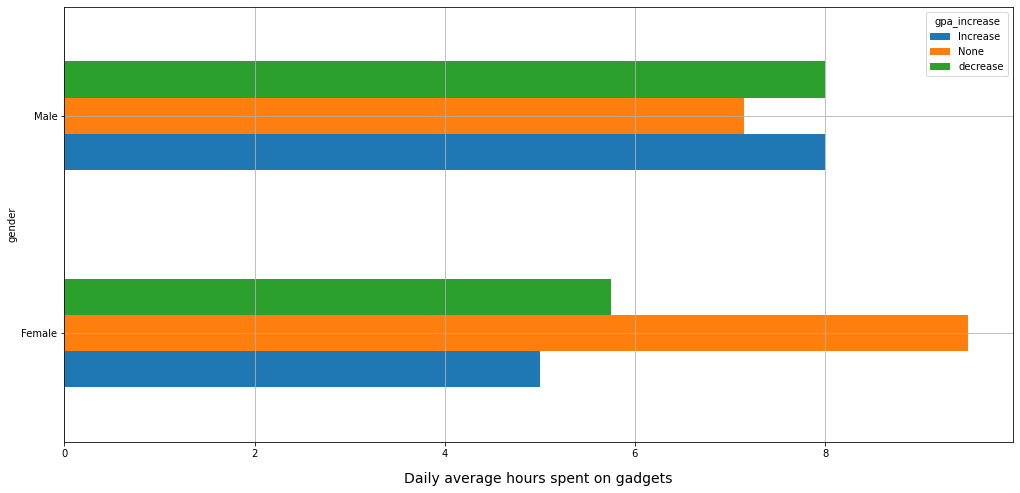

In [13]:
pd.pivot_table(techno, index = 'gender', columns = 'gpa_increase',
               values = 'daily_hour', aggfunc = 'mean').plot(kind = 'barh', figsize = (17,8));
plt.xlabel('Daily average hours spent on gadgets', fontsize = 14, labelpad = 13)
plt.grid()

In [14]:
purpose_freq = techno['purpose'].str.split(',', expand = True).stack().value_counts()

In [15]:
# let's say we have a series or list
purpose_freq 
# so you can see studies count is 29,
# entertainment is 25...

Studies           29
 Entertainment    25
 Phone call       23
 Online class     20
 Movies           11
 games             9
Online class       1
dtype: int64

In [16]:
# so we want to create a pie chart
# we need matplotlib
import matplotlib.pyplot as plt

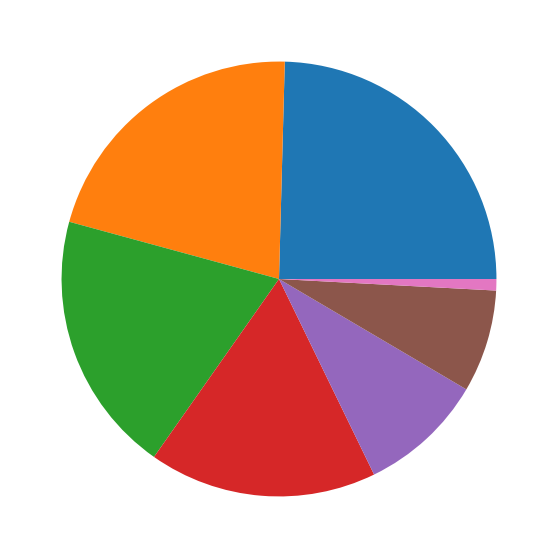

In [17]:
plt.figure(figsize = (10,10)) # adjusting the size 
plt.pie(purpose_freq); # simple pie chart
# but we can add some parameters to give more insight

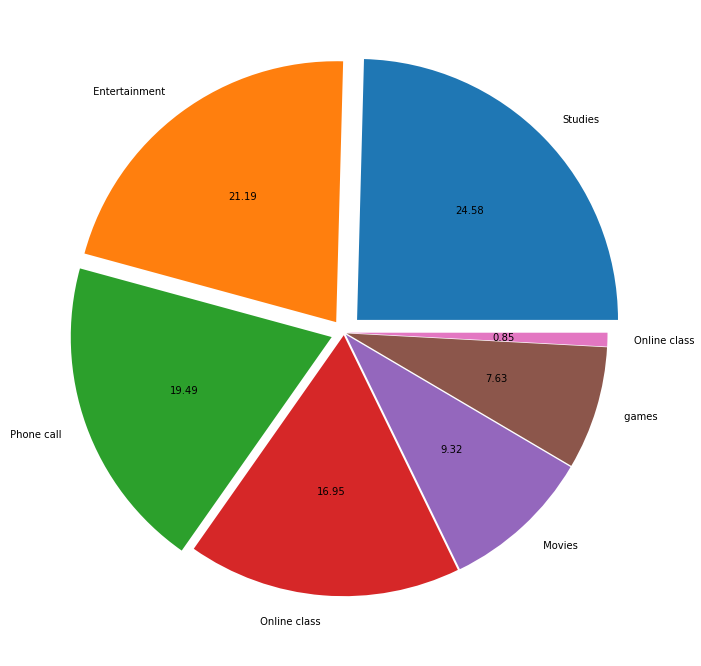

In [18]:
plt.figure(figsize = (12,12)) # adjusting the size 
plt.pie(purpose_freq, autopct='%.2f',# gives relative value
        explode = (0.07,0.05,0.05,0.01,0.01,0.01,0.01), # to seperate parts
        labels = purpose_freq.index # assignes the labels
       );

In [ ]:
# So most of the survvey participants chose Studies as the reason of using gadgets
# The next position goes to Entertainment.
# Surprisingly, Online class is the choice that have least votes, 
# maybe because students include this when they chose Studies

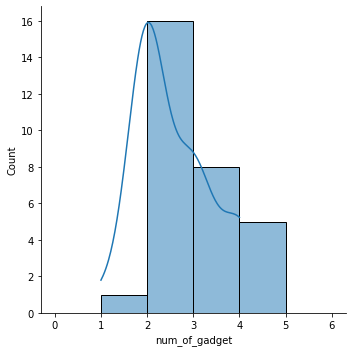

In [20]:
sns.displot(data = techno, x = 'num_of_gadget', bins  = [0,1,2,3,4,5,6], kde = True);

Text(0, 0.5, 'Daily hours spent on gadgets')

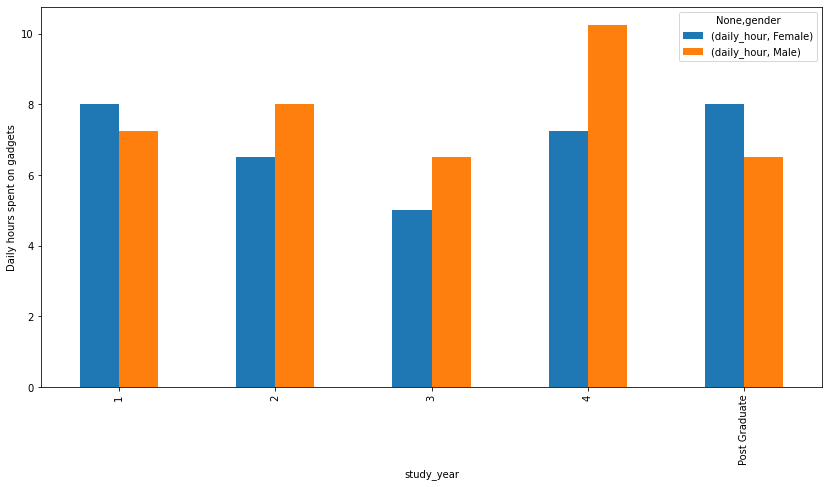

In [21]:
pd.pivot_table(techno, index = 'study_year', columns = 'gender', values = ['daily_hour']).plot(kind = 'bar', figsize = (14,7))
plt.ylabel('Daily hours spent on gadgets')

In [ ]:
# So for the first year of study and advanced study years, 
# females tend to spend more time on gadgets while males during 2-4 years

In [22]:
techno[['department', 
        'num_of_gadget']].groupby('department').mean().round().sort_values('num_of_gadget', 
                                                                                         ascending = False)

,num_of_gadget
department,
Business Management,3.0
Creative Industries,3.0
Information Technology,3.0
Allied Health Sciences,2.0
Architecture & Built Environment,2.0
Education & Liberal Studies,2.0
Engineering,2.0
Hospitality & Tourism,2.0


In [24]:
techno.head()

,time,gender,study_year,department,num_of_gadget,recent_grade,gpa_increase,mean_hour,purpose,daily_hour
0,2022-07-19 12:26:34,Female,4,Information Technology,2,3.00-3.49,Increase,4-6,"Studies, Entertainment, Phone call",5.0
1,2022-07-21 02:19:26,Male,Post Graduate,Business Management,4,3.00-3.49,decrease,1-3,"Studies, Entertainment, Online class, games, M...",2.0
2,2022-07-21 18:55:02,Male,3,Information Technology,3,3.50 - 3.99,Increase,4-6,"Studies, Entertainment, Online class, Phone call",5.0
3,2022-08-22 10:01:30,Female,3,Engineering,3,2.50-2.99,decrease,1-3,"Studies, Entertainment, Online class, games, M...",2.0
4,2022-08-22 10:02:05,Male,2,Architecture & Built Environment,2,3.00-3.49,Increase,4-6,"Studies, Entertainment",5.0


In [ ]:
# Business and technology departments tend to own more gadgets than other department students

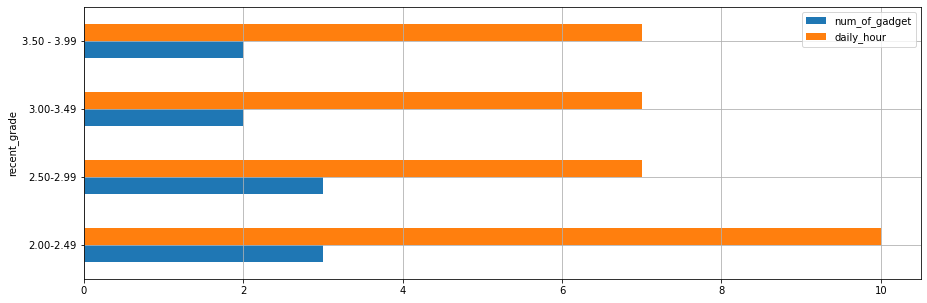

In [23]:
techno.groupby('recent_grade').mean().round().plot(kind = 'barh', figsize = (15,5))
plt.grid()

In [ ]:
# Those who have more gadgets tend to spent more time on those devices, 
# Also, those people showed lower overall gpa in their studies,
# highest grade holders have average two devices and spent 7 hours a day on screen

In [ ]:
df = techno[['time', 'num_of_gadget']]

new_df = df.set_index('time')
new_df = new_df.resample('W').sum()
new_df['num_of_gadget'] = [9,11,10,14,7,11,9,12,15]

new_df
# Let's do line graph for the number
# of gadgets over time

# We need matplotlib
import matplotlib.pyplot as plt
plt.plot(new_df)

In [ ]:
# we can make it more insightfull

plt.figure(figsize = (10,9)) # size adjustment
plt.plot(new_df); #plotting
plt.xticks(rotation = 50); # rotating x ticks to 50C 
plt.ylabel('Number of gadgets', labelpad = 20) # assigning y - label
plt.xlabel('Date', labelpad = 20)
plt.grid()